In [1]:
import warnings
import sys
import re
sys.path.insert(0, "../modules")

import numpy as np
import pandas as pd


import plotly.express as px
import cufflinks as cf
cf.go_offline()
import matplotlib.pylab as plt

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
warnings.filterwarnings("ignore", message="is_categorical_dtype is deprecated")
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated")

In [3]:
# Cargamos dataset y creamos la columna dimensions "volumen":
diamonds = pd.read_csv('./csv_tables/diamonds.csv')
diamonds['dimensions'] = diamonds['x'] * diamonds['y'] * diamonds['z']
diamonds

,city,price,carat,depth,table,x,y,z,clarity,color,cut,dimensions
0,Tel Aviv,6409,1.22,63.2,58.0,6.82,6.76,4.29,SI2,G,Very Good,197.782728
1,Tel Aviv,4340,1.07,64.6,60.0,6.35,6.40,4.12,SI2,G,Very Good,167.436800
2,Madrid,9384,1.50,63.1,57.0,7.29,7.25,4.59,SI2,G,Very Good,242.592975
3,Kimberly,1986,0.73,62.6,56.0,5.77,5.79,3.62,SI2,G,Very Good,120.938046
4,Las Vegas,3618,0.92,59.4,62.0,6.34,6.36,3.77,SI2,G,Very Good,152.015448
...,...,...,...,...,...,...,...,...,...,...,...,...
40450,Dubai,2762,0.70,64.5,57.0,5.57,5.53,3.58,VS2,F,Fair,110.271518
40451,Antwerp,4536,0.90,59.5,67.0,6.29,6.24,3.73,VS2,F,Fair,146.401008
40452,Antwerp,982,0.46,66.0,58.0,4.90,4.76,3.19,VS2,F,Fair,74.403560
40453,Tel Aviv,816,0.34,64.7,55.0,4.52,4.41,2.89,VS2,F,Fair,57.606948


Primero analizaré la información de **records y features**

In [4]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        40455 non-null  object 
 1   price       40455 non-null  int64  
 2   carat       40455 non-null  float64
 3   depth       40455 non-null  float64
 4   table       40455 non-null  float64
 5   x           40455 non-null  float64
 6   y           40455 non-null  float64
 7   z           40455 non-null  float64
 8   clarity     40455 non-null  object 
 9   color       40455 non-null  object 
 10  cut         40455 non-null  object 
 11  dimensions  40455 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 3.7+ MB


Para empezar, NO hay **valores nulos**

**Features:**

- **Numéricas:** price, carat, depth, table, dimensions, x, y, z
- **Categóricas:** city, clarity, color, cut

# Numérico

## 1. Precio

In [5]:
diamonds['price'].sort_values().reset_index(drop=True)

0          326
1          326
2          327
3          334
4          335
         ...  
40450    18795
40451    18797
40452    18806
40453    18818
40454    18823
Name: price, Length: 40455, dtype: int64

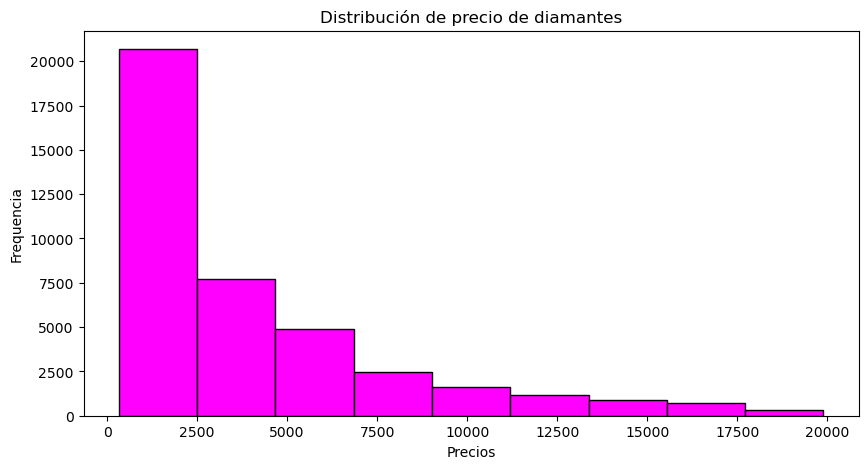

In [6]:
binwidth = 2500 - 326
bins=range(min(diamonds['price']), max(diamonds['price']) + binwidth, binwidth)
plt.figure(figsize=(10, 5))
plt.hist(diamonds['price'], bins, color='magenta', edgecolor='black')
plt.xlabel('Precios')
plt.ylabel('Frequencia')
plt.title('Distribución de precio de diamantes')
plt.show()

Podemos observar que el histograma del precio está **sesgado a la derecha** debido a los outliers **mayores a la media y mediana.**

## 2. Carat

In [7]:
diamonds['carat'].sort_values().reset_index(drop=True)

0        0.20
1        0.20
2        0.20
3        0.20
4        0.20
         ... 
40450    4.00
40451    4.01
40452    4.01
40453    4.13
40454    4.50
Name: carat, Length: 40455, dtype: float64

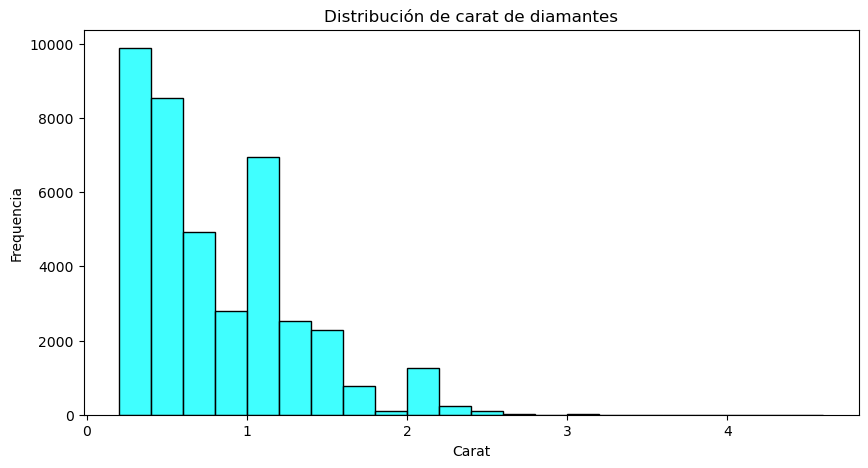

In [8]:
plt.figure(figsize=(10, 5))
# plt.hist(diamonds['carat'], bins=15, color='cyan', edgecolor='black')
sns.histplot(diamonds['carat'], binwidth=0.2, color='cyan', edgecolor='black')
plt.xlabel('Carat')
plt.ylabel('Frequencia')
plt.title('Distribución de carat de diamantes')
plt.show()

El histograma del **Carat** tiene un comportamiento **parecido al precio.** También está **sesgado a la derecha** debido a los outliers **mayores a la media y mediana.**

## 3. Depth

In [9]:
diamonds['depth'].sort_values().reset_index(drop=True)

0        43.0
1        43.0
2        44.0
3        52.3
4        52.7
         ... 
40450    71.8
40451    72.2
40452    72.9
40453    73.6
40454    79.0
Name: depth, Length: 40455, dtype: float64

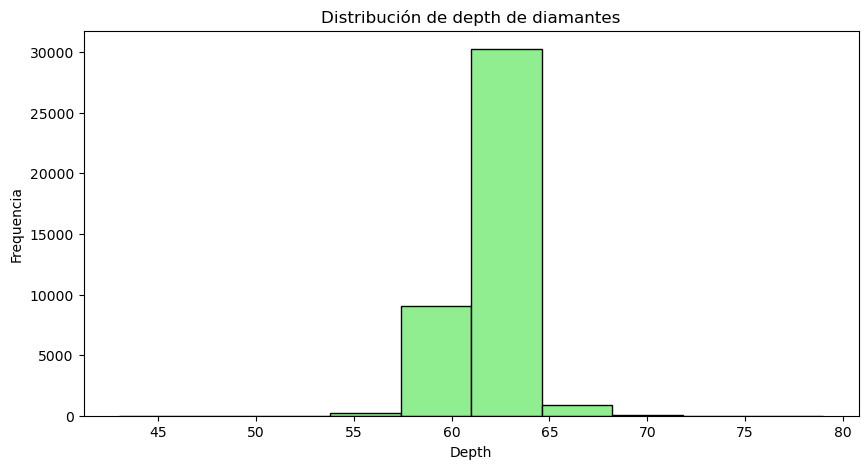

In [10]:
plt.figure(figsize=(10, 5))
plt.hist(diamonds['depth'], bins=10, color='lightgreen', edgecolor='black')
plt.xlabel('Depth')
plt.ylabel('Frequencia')
plt.title('Distribución de depth de diamantes')
plt.show()

In [11]:
diamonds['depth'].describe()

count    40455.000000
mean        61.752841
std          1.431725
min         43.000000
25%         61.000000
50%         61.800000
75%         62.500000
max         79.000000
Name: depth, dtype: float64

El histograma del **depth** mantiene un comportamiento de distribución normal **centrado** hacia la mediana y la media

## 4. table

In [12]:
diamonds['table'].sort_values().reset_index(drop=True)

0        43.0
1        44.0
2        49.0
3        49.0
4        50.0
         ... 
40450    73.0
40451    73.0
40452    76.0
40453    79.0
40454    95.0
Name: table, Length: 40455, dtype: float64

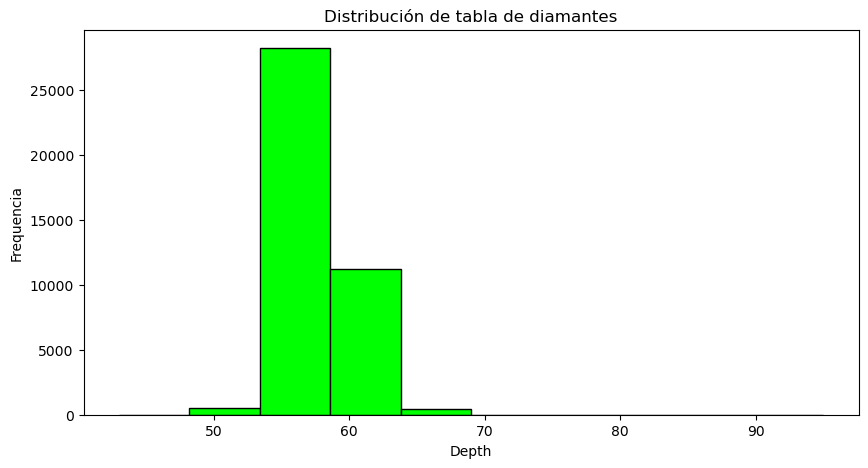

In [13]:
plt.figure(figsize=(10, 5))
plt.hist(diamonds['table'], bins=10, color='lime', edgecolor='black')
plt.xlabel('Depth')
plt.ylabel('Frequencia')
plt.title('Distribución de tabla de diamantes')
plt.show()

In [14]:
diamonds['table'].describe()

count    40455.000000
mean        57.446133
std          2.233535
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

Al igual que el histograma del **depth**, en cuanto al **table** mantiene un comportamiento de distribución normal **centrado** hacia la mediana y la media

# Observaciones Numéricas

## 1. Precio

In [15]:
print(diamonds['price'].describe())

count    40455.000000
mean      3928.444469
std       3992.416147
min        326.000000
25%        945.000000
50%       2397.000000
75%       5331.000000
max      18823.000000
Name: price, dtype: float64


In [16]:
mean_max = diamonds['price'].max() / diamonds['price'].mean()
print(mean_max)

median_max = diamonds['price'].max() / diamonds['price'].median()
print(median_max)

4.7914639363628755
7.85273258239466


Podemos observar con respecto al **máximo precio** (max=18823.00) que:

1. Es casi **5 veces** el valor de la **media**
2. Es casi **7 veces** el valor de la **mediana**

En este punto daré un manejo a los outliers, hallando el **rango intercuartil**

In [17]:
# Percentil 75
pcnt_75 = diamonds['price'].quantile(0.75)

# Percentil 25
pcnt_25 = diamonds['price'].quantile(0.25)

# Interquartile range (IQR)
iqr_price = pcnt_75 - pcnt_25
iqr_price

4386.0

Hallermos los outliers **superiores** e **inferiores**

In [18]:
# Upper outliers > 75th percentile + (1.5 * IQR) # El límite superior para determinar outliers
upper = pcnt_75 + (1.5 * iqr_price)

# Lower outliers < 25th percentile - (1.5 * IQR) # El límite inferior para determinar outliers
lower = pcnt_25 - (1.5 * iqr_price)

print(upper, lower)

11910.0 -5634.0


In [19]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        40455 non-null  object 
 1   price       40455 non-null  int64  
 2   carat       40455 non-null  float64
 3   depth       40455 non-null  float64
 4   table       40455 non-null  float64
 5   x           40455 non-null  float64
 6   y           40455 non-null  float64
 7   z           40455 non-null  float64
 8   clarity     40455 non-null  object 
 9   color       40455 non-null  object 
 10  cut         40455 non-null  object 
 11  dimensions  40455 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 3.7+ MB


1. Primero guardamos en un nuevo dataframe los **NO outliers:**

In [21]:
# Con AND (&) regresa True para las filas donde el precio es mayor que lower, y menor que upper:
no_outliers = (diamonds[(diamonds['price'] > lower) & (diamonds['price'] < upper)]).reset_index(drop=True)
no_outliers

,city,price,carat,depth,table,x,y,z,clarity,color,cut,dimensions
0,Tel Aviv,6409,1.22,63.2,58.0,6.82,6.76,4.29,SI2,G,Very Good,197.782728
1,Tel Aviv,4340,1.07,64.6,60.0,6.35,6.40,4.12,SI2,G,Very Good,167.436800
2,Madrid,9384,1.50,63.1,57.0,7.29,7.25,4.59,SI2,G,Very Good,242.592975
3,Kimberly,1986,0.73,62.6,56.0,5.77,5.79,3.62,SI2,G,Very Good,120.938046
4,Las Vegas,3618,0.92,59.4,62.0,6.34,6.36,3.77,SI2,G,Very Good,152.015448
...,...,...,...,...,...,...,...,...,...,...,...,...
37809,Dubai,2762,0.70,64.5,57.0,5.57,5.53,3.58,VS2,F,Fair,110.271518
37810,Antwerp,4536,0.90,59.5,67.0,6.29,6.24,3.73,VS2,F,Fair,146.401008
37811,Antwerp,982,0.46,66.0,58.0,4.90,4.76,3.19,VS2,F,Fair,74.403560
37812,Tel Aviv,816,0.34,64.7,55.0,4.52,4.41,2.89,VS2,F,Fair,57.606948


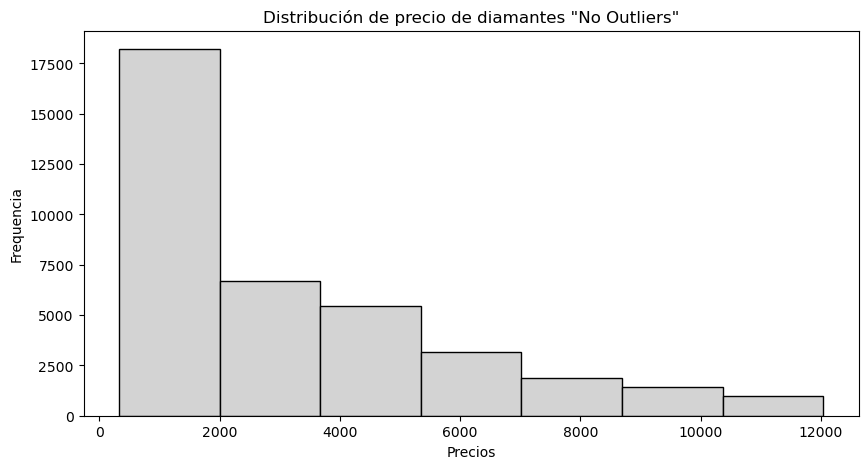

In [22]:
binwidth = 2000 - 326
bins=range(min(no_outliers['price']), max(no_outliers['price']) + binwidth, binwidth)
plt.figure(figsize=(10, 5))
plt.hist(no_outliers['price'], bins, color='lightgray', edgecolor='black') # bins = 15
plt.xlabel('Precios')
plt.ylabel('Frequencia')
plt.title('Distribución de precio de diamantes "No Outliers"')
plt.show()

Sin embargo (y pongo "entre comillas" no outliers), la distribución sigue mostrando un comportamiento sesgado hacia la derecha. 

2. Ahora vamos a crear un nuevo dataframe **diamonds** sin los "no outliers".

In [23]:
# Subsetting data

# Con OR (|) regresa True para las filas donde el precio es menor que lower o mayor que upper:

diamonds = (diamonds[(diamonds['price'] < lower) | (diamonds['price'] > upper)][['city',
                                                                     'price','carat', 'depth', 
                                                                     'table', 'clarity', 
                                                                     'color', 'cut', 'dimensions']]).reset_index(drop=True)
diamonds                                                                       

,city,price,carat,depth,table,clarity,color,cut,dimensions
0,Paris,16389,2.04,59.9,58.0,SI2,G,Very Good,340.457376
1,London,12094,2.02,63.1,57.0,SI2,G,Very Good,321.752088
2,Antwerp,15166,2.16,62.6,55.0,SI2,G,Very Good,347.721000
3,New York City,16878,2.18,63.1,58.0,SI2,G,Very Good,355.461107
4,Kimberly,16188,2.11,62.2,60.0,SI2,G,Very Good,339.082380
...,...,...,...,...,...,...,...,...,...
2636,Luxembourg,13474,1.51,62.2,60.0,VS2,F,Premium,241.596100
2637,Antwerp,14388,1.52,59.4,55.0,VS2,F,Premium,249.641440
2638,Antwerp,15602,1.59,60.2,60.0,VS2,F,Premium,264.887964
2639,Amsterdam,14294,1.51,62.0,60.0,VS2,F,Premium,240.195060


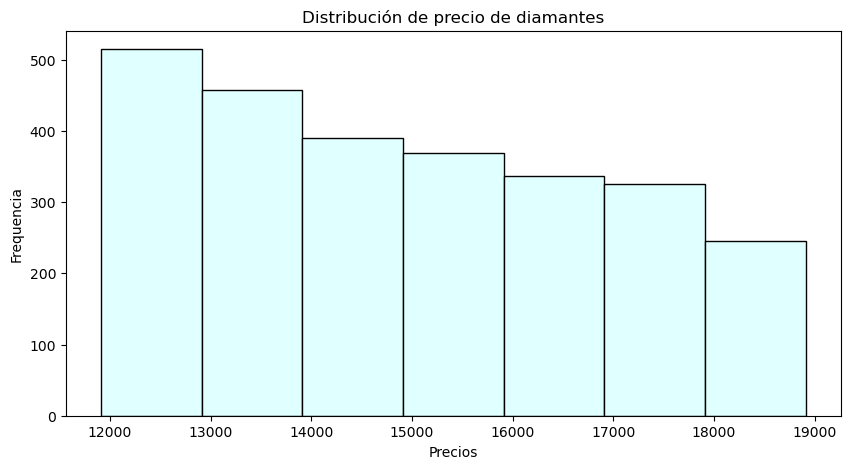

In [24]:
binwidth = 1000
bins=range(min(diamonds['price']), max(diamonds['price']) + binwidth, binwidth)
plt.figure(figsize=(10, 5))
plt.hist(diamonds['price'], bins, color='lightcyan', edgecolor='black') # bins = 15
plt.xlabel('Precios')
plt.ylabel('Frequencia')
plt.title('Distribución de precio de diamantes')
plt.show()

Esta gráfica muestra una distribución **más centrada** que la de "no outliers".

Comparemos en una **fila y 2 columnas** (1,2):

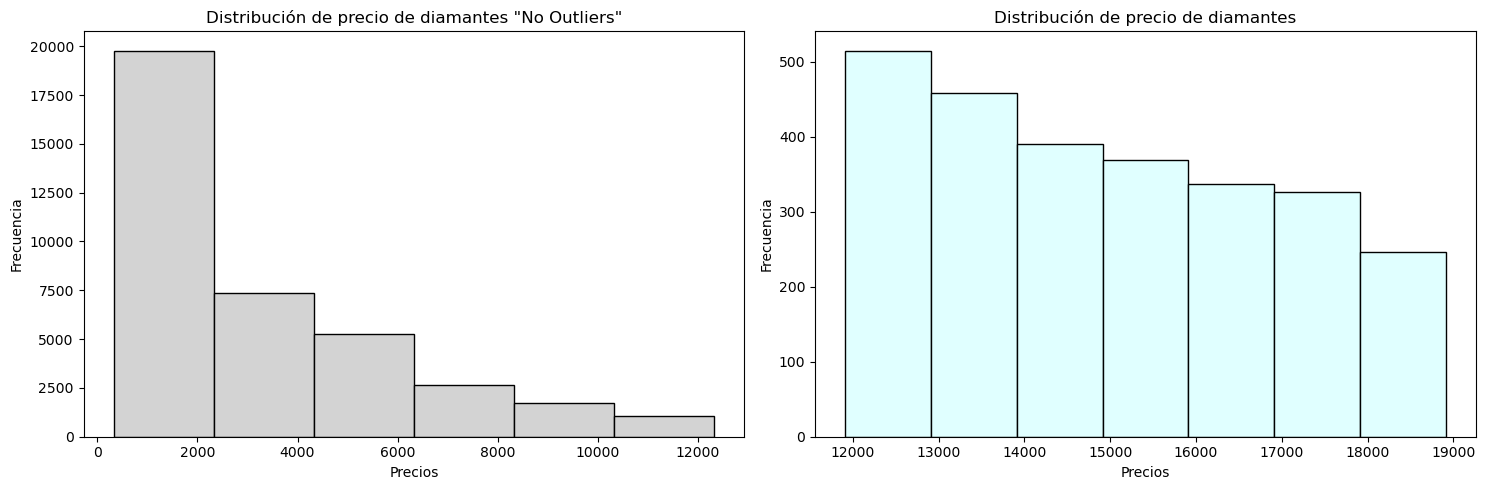

In [25]:
# No Outliers
binwidth_no_outliers = 2000
bins_no_outliers = range(min(no_outliers['price']), max(no_outliers['price']) + binwidth_no_outliers, binwidth_no_outliers)
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist(no_outliers['price'], bins=bins_no_outliers, color='lightgray', edgecolor='black')
plt.xlabel('Precios')
plt.ylabel('Frecuencia')
plt.title('Distribución de precio de diamantes "No Outliers"')

# Diamonds
binwidth = 1000
bins = range(min(diamonds['price']), max(diamonds['price']) + binwidth, binwidth)

plt.subplot(1, 2, 2)
plt.hist(diamonds['price'], bins=bins, color='lightcyan', edgecolor='black')
plt.xlabel('Precios')
plt.ylabel('Frecuencia')
plt.title('Distribución de precio de diamantes')

plt.tight_layout() 
plt.show()

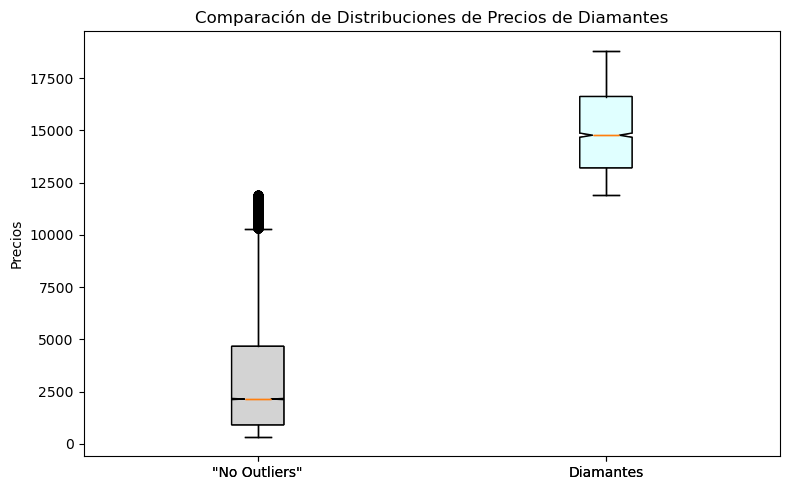

In [26]:
plt.figure(figsize=(8, 5))

# notch=True => Muestra la mediana en la caja 
# patch_artist=True => Rellenar la caja de color
plt.boxplot([no_outliers['price'], diamonds['price']], labels=['"No Outliers"', 'Diamantes'], notch=True, patch_artist=True)

colors = ['lightgray', 'lightcyan']

# zip => Asigna a las cajas sus colores
for box, color in zip(plt.boxplot([no_outliers['price'], diamonds['price']], labels=['"No Outliers"', 'Diamantes'], notch=True, patch_artist=True)['boxes'], colors):
    box.set_facecolor(color)

plt.ylabel('Precios')
plt.title('Comparación de Distribuciones de Precios de Diamantes')
plt.tight_layout() 
plt.show()

In [27]:
diamonds['price'].describe()

count     2641.000000
mean     14967.531238
std       1972.269579
min      11912.000000
25%      13214.000000
50%      14775.000000
75%      16626.000000
max      18823.000000
Name: price, dtype: float64

Con el Boxplot, podemos ver claramente la **diferencia entre** "no outliers" y "diamonds".

Además, se acerca un poco a mi hipótesis (a priori), que la media **podía ser el valor de USD $10k.**

Ahora, para el análisis del **Carat** me quedaré con el Boxplot **Diamantes** que corresponde al Dataframe **diamonds.**

## 2. Carat

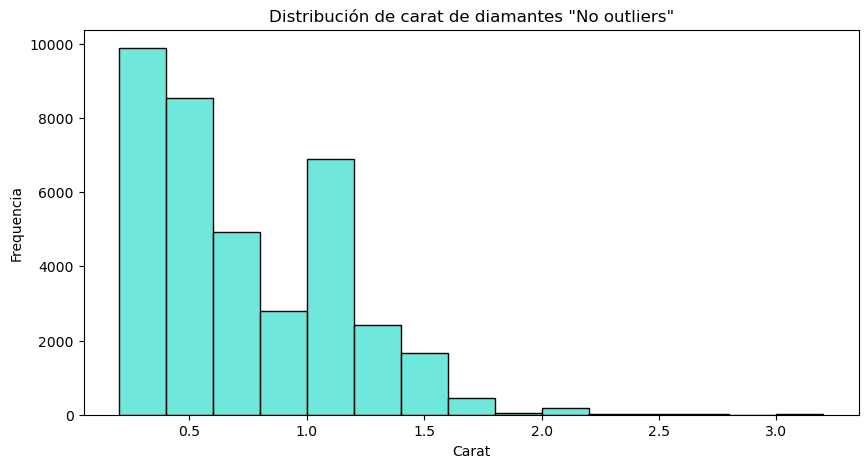

In [29]:
plt.figure(figsize=(10, 5))
# plt.hist(diamonds['carat'], bins=15, color='cyan', edgecolor='black')
sns.histplot(no_outliers['carat'], binwidth=0.2, color='turquoise', edgecolor='black')
plt.xlabel('Carat')
plt.ylabel('Frequencia')
plt.title('Distribución de carat de diamantes "No outliers"')
plt.show()

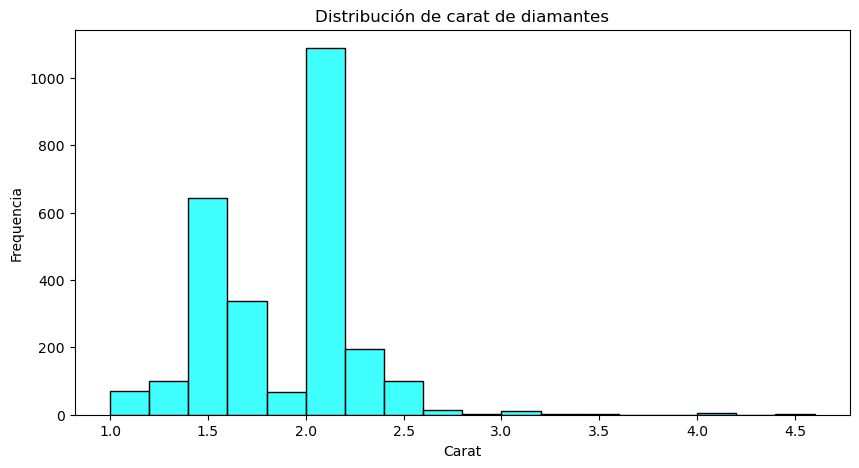

In [30]:
plt.figure(figsize=(10, 5))
# plt.hist(diamonds['carat'], bins=15, color='cyan', edgecolor='black')
sns.histplot(diamonds['carat'], binwidth=0.2, color='cyan', edgecolor='black')
plt.xlabel('Carat')
plt.ylabel('Frequencia')
plt.title('Distribución de carat de diamantes')
plt.show()

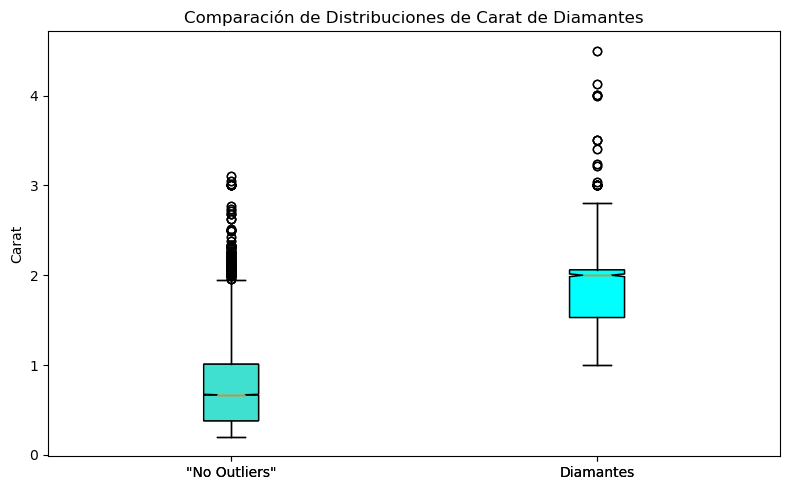

In [31]:
plt.figure(figsize=(8, 5))

# notch=True => Muestra la mediana en la caja 
# patch_artist=True => Rellenar la caja de color
plt.boxplot([no_outliers['carat'], diamonds['carat']], labels=['"No Outliers"', 'Diamantes'], notch=True, patch_artist=True)

colors = ['turquoise', 'cyan']

# zip => Asigna a las cajas sus colores
for box, color in zip(plt.boxplot([no_outliers['carat'], diamonds['carat']], labels=['"No Outliers"', 'Diamantes'], notch=True, patch_artist=True)['boxes'], colors):
    box.set_facecolor(color)

plt.ylabel('Carat')
plt.title('Comparación de Distribuciones de Carat de Diamantes')
plt.tight_layout() 
plt.show()

Si estamos pensando en Machine Learning:
- Necesitamos mayor precisión en los datos
- Para pruebas estadísticas necesitamos una distribución normal de los datos (no sesgados)

En este punto daré un manejo a los outliers del **Carat** hallando el **rango intercuartil**

In [32]:
# Percentil 75
pcnt_75 = diamonds['carat'].quantile(0.75)

# Percentil 25
pcnt_25 = diamonds['carat'].quantile(0.25)

# Interquartile range (IQR)
iqr_price = pcnt_75 - pcnt_25
iqr_price

0.53

In [33]:
# Upper outliers > 75th percentile + (1.5 * IQR) # El límite superior para determinar outliers
upper = pcnt_75 + (1.5 * iqr_price)

# Lower outliers < 25th percentile - (1.5 * IQR) # El límite inferior para determinar outliers
lower = pcnt_25 - (1.5 * iqr_price)

print(upper, lower)

2.855 0.735


In [34]:
no_outliers_carat = (diamonds[(diamonds['carat'] > lower) & (diamonds['carat'] < upper)]).reset_index(drop=True)
no_outliers_carat

,city,price,carat,depth,table,clarity,color,cut,dimensions
0,Paris,16389,2.04,59.9,58.0,SI2,G,Very Good,340.457376
1,London,12094,2.02,63.1,57.0,SI2,G,Very Good,321.752088
2,Antwerp,15166,2.16,62.6,55.0,SI2,G,Very Good,347.721000
3,New York City,16878,2.18,63.1,58.0,SI2,G,Very Good,355.461107
4,Kimberly,16188,2.11,62.2,60.0,SI2,G,Very Good,339.082380
...,...,...,...,...,...,...,...,...,...
2614,Luxembourg,13474,1.51,62.2,60.0,VS2,F,Premium,241.596100
2615,Antwerp,14388,1.52,59.4,55.0,VS2,F,Premium,249.641440
2616,Antwerp,15602,1.59,60.2,60.0,VS2,F,Premium,264.887964
2617,Amsterdam,14294,1.51,62.0,60.0,VS2,F,Premium,240.195060


In [35]:
no_outliers_carat['carat'].describe()

count    2619.000000
mean        1.850157
std         0.331572
min         1.000000
25%         1.530000
50%         2.000000
75%         2.060000
max         2.800000
Name: carat, dtype: float64

**Repetimos los pasos** para 'price' en 'carat'

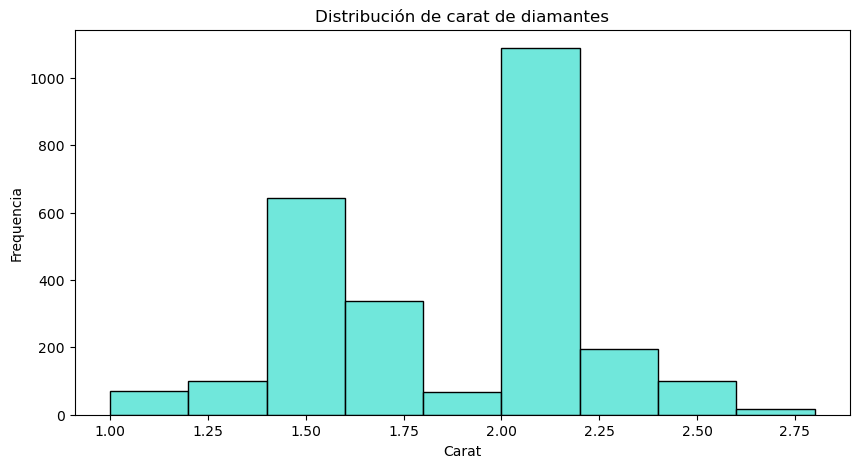

In [36]:
plt.figure(figsize=(10, 5))
# plt.hist(diamonds['carat'], bins=15, color='cyan', edgecolor='black')
sns.histplot(no_outliers_carat['carat'], binwidth=0.2, color='turquoise', edgecolor='black')
plt.xlabel('Carat')
plt.ylabel('Frequencia')
plt.title('Distribución de carat de diamantes')
plt.show()

In [37]:
# Subsetting data

diamonds = (diamonds[(diamonds['carat'] < lower) | (diamonds['carat'] > upper)][['city',
                                                                     'price','carat', 'depth', 
                                                                     'table', 'clarity', 
                                                                     'color', 'cut', 'dimensions']]).reset_index(drop=True)
diamonds   

,city,price,carat,depth,table,clarity,color,cut,dimensions
0,London,14220,3.01,59.8,58.0,SI2,G,Premium,497.104736
1,New York City,18593,3.01,57.6,64.0,SI2,H,Good,479.925824
2,Surat,16037,3.01,61.7,58.0,SI2,J,Ideal,484.219000
3,Kimberly,18710,3.01,59.7,58.0,SI2,J,Premium,490.249708
4,Antwerp,18242,3.01,63.9,60.0,SI2,I,Good,471.008562
5,Zurich,18242,3.01,63.9,60.0,SI2,I,Good,471.008562
6,Madrid,16970,3.00,60.7,59.0,SI2,I,Premium,476.011200
7,Madrid,18559,3.04,59.3,60.0,SI2,I,Premium,505.601052
8,Antwerp,18242,3.01,60.2,59.0,SI2,I,Premium,489.735792
9,Antwerp,16970,3.00,64.8,59.0,SI2,I,Fair,445.924908


In [38]:
diamonds['carat'].describe()

count    22.000000
mean      3.347727
std       0.472359
min       3.000000
25%       3.010000
50%       3.025000
75%       3.507500
max       4.500000
Name: carat, dtype: float64

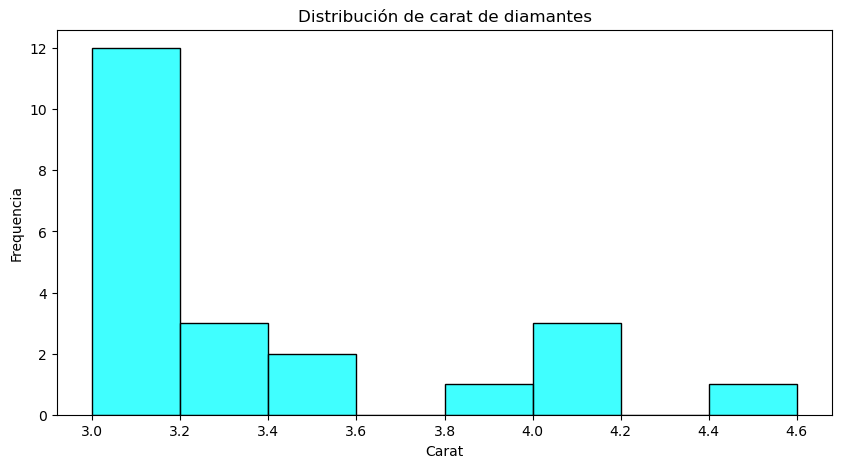

In [39]:
plt.figure(figsize=(10, 5))
# plt.hist(diamonds['carat'], bins=15, color='cyan', edgecolor='black')
sns.histplot(diamonds['carat'], binwidth=0.2, color='cyan', edgecolor='black')
plt.xlabel('Carat')
plt.ylabel('Frequencia')
plt.title('Distribución de carat de diamantes')
plt.show()

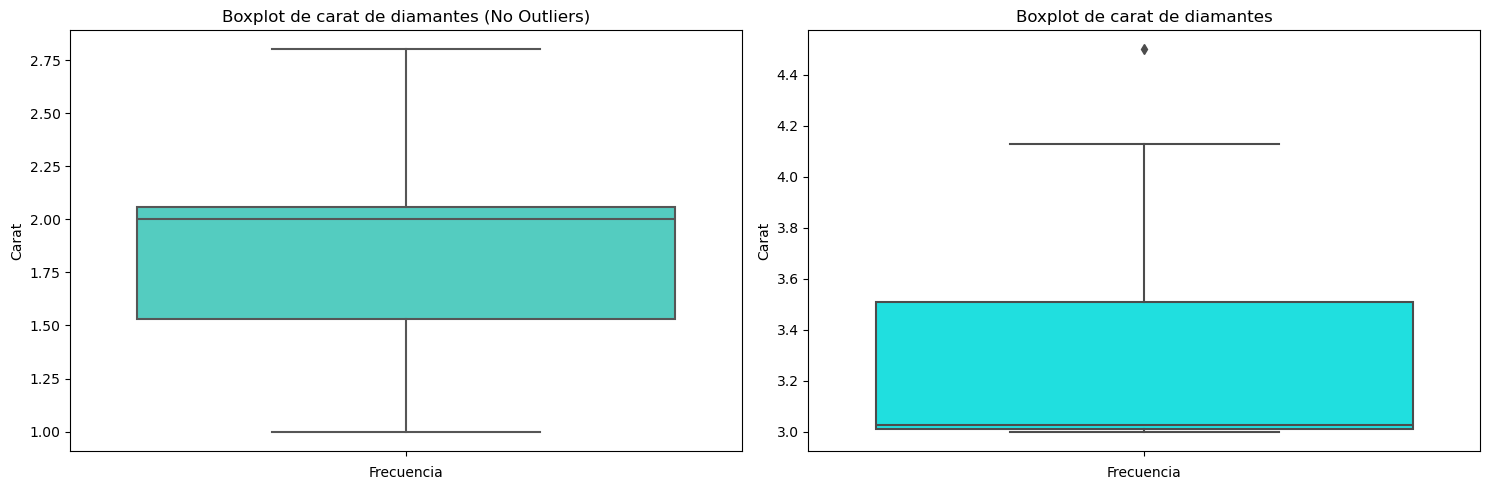

In [40]:
# Primer boxplot
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)  
sns.boxplot(y='carat', data=no_outliers_carat, color='turquoise')
plt.ylabel('Carat')
plt.xlabel('Frecuencia')
plt.title('Boxplot de carat de diamantes (No Outliers)')

# Segundo boxplot
plt.subplot(1, 2, 2) 
sns.boxplot(y='carat', data=diamonds, color='cyan')
plt.ylabel('Carat')
plt.xlabel('Frecuencia')
plt.title('Boxplot de carat de diamantes')

plt.tight_layout() 
plt.show()

Los no outliers para carat muestran una distribución más centrada, por lo cual me guardo en **diamonds** una copia del dataframe **no_outliers_carat.**

In [41]:
diamonds = no_outliers_carat.copy()
diamonds

,city,price,carat,depth,table,clarity,color,cut,dimensions
0,Paris,16389,2.04,59.9,58.0,SI2,G,Very Good,340.457376
1,London,12094,2.02,63.1,57.0,SI2,G,Very Good,321.752088
2,Antwerp,15166,2.16,62.6,55.0,SI2,G,Very Good,347.721000
3,New York City,16878,2.18,63.1,58.0,SI2,G,Very Good,355.461107
4,Kimberly,16188,2.11,62.2,60.0,SI2,G,Very Good,339.082380
...,...,...,...,...,...,...,...,...,...
2614,Luxembourg,13474,1.51,62.2,60.0,VS2,F,Premium,241.596100
2615,Antwerp,14388,1.52,59.4,55.0,VS2,F,Premium,249.641440
2616,Antwerp,15602,1.59,60.2,60.0,VS2,F,Premium,264.887964
2617,Amsterdam,14294,1.51,62.0,60.0,VS2,F,Premium,240.195060


Repetiré los pasos para **Depth** y **Table:**

## 3. Depth

In [43]:
# Percentil 75
pcnt_75 = diamonds['depth'].quantile(0.75)

# Percentil 25
pcnt_25 = diamonds['depth'].quantile(0.25)

# Interquartile range (IQR)
iqr_price = pcnt_75 - pcnt_25
iqr_price

1.7000000000000028

In [44]:
# Upper outliers > 75th percentile + (1.5 * IQR) # El límite superior para determinar outliers
upper = pcnt_75 + (1.5 * iqr_price)

# Lower outliers < 25th percentile - (1.5 * IQR) # El límite inferior para determinar outliers
lower = pcnt_25 - (1.5 * iqr_price)

print(upper, lower)

65.05000000000001 58.24999999999999


In [45]:
no_outliers_depth = (diamonds[(diamonds['depth'] > lower) & (diamonds['depth'] < upper)]).reset_index(drop=True)
no_outliers_depth

,city,price,carat,depth,table,clarity,color,cut,dimensions
0,Paris,16389,2.04,59.9,58.0,SI2,G,Very Good,340.457376
1,London,12094,2.02,63.1,57.0,SI2,G,Very Good,321.752088
2,Antwerp,15166,2.16,62.6,55.0,SI2,G,Very Good,347.721000
3,New York City,16878,2.18,63.1,58.0,SI2,G,Very Good,355.461107
4,Kimberly,16188,2.11,62.2,60.0,SI2,G,Very Good,339.082380
...,...,...,...,...,...,...,...,...,...
2538,Antwerp,14833,1.61,61.6,61.0,VS2,F,Premium,260.215956
2539,Luxembourg,13474,1.51,62.2,60.0,VS2,F,Premium,241.596100
2540,Antwerp,14388,1.52,59.4,55.0,VS2,F,Premium,249.641440
2541,Antwerp,15602,1.59,60.2,60.0,VS2,F,Premium,264.887964


In [46]:
# Subsetting data

diamonds = (diamonds[(diamonds['depth'] < lower) | (diamonds['depth'] > upper)][['city',
                                                                     'price','carat', 'depth', 
                                                                     'table', 'clarity', 
                                                                     'color', 'cut', 'dimensions']]).reset_index(drop=True)
diamonds  

,city,price,carat,depth,table,clarity,color,cut,dimensions
0,Surat,16462,2.13,57.9,60.0,SI2,G,Very Good,353.468936
1,Madrid,12929,2.02,57.5,61.0,SI2,G,Good,336.168495
2,Luxembourg,12450,2.01,56.2,63.0,SI2,G,Fair,316.190016
3,Paris,14208,2.00,66.5,56.0,SI2,G,Fair,306.729500
4,Kimberly,14194,2.50,67.0,57.0,SI2,G,Fair,386.718552
...,...,...,...,...,...,...,...,...,...
71,Surat,16789,2.02,57.9,62.0,VS2,I,Good,327.995250
72,Las Vegas,15729,2.01,66.3,57.0,VS2,I,Fair,310.517190
73,Luxembourg,14565,1.50,57.8,63.0,VS2,E,Good,249.428238
74,London,12283,1.52,57.8,59.0,VS2,F,Good,247.866000


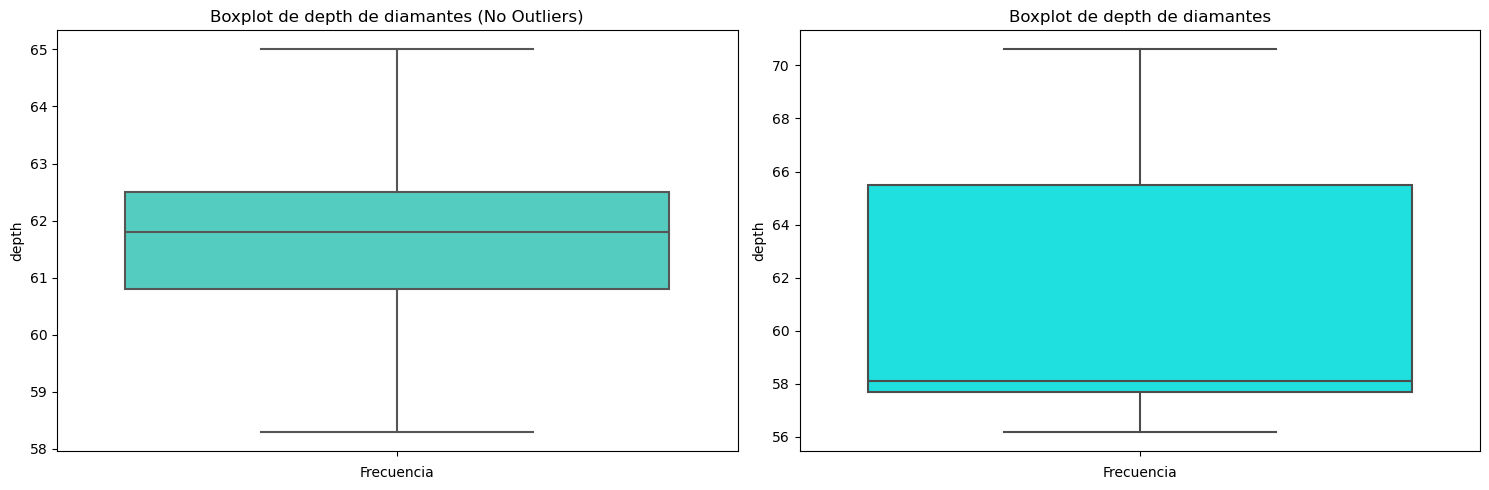

In [47]:
# Primer boxplot
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1) 
sns.boxplot(y='depth', data=no_outliers_depth, color='turquoise')
plt.ylabel('depth')
plt.xlabel('Frecuencia')
plt.title('Boxplot de depth de diamantes (No Outliers)')

# Segundo boxplot
plt.subplot(1, 2, 2)  
sns.boxplot(y='depth', data=diamonds, color='cyan')
plt.ylabel('depth')
plt.xlabel('Frecuencia')
plt.title('Boxplot de depth de diamantes')

plt.tight_layout()  
plt.show()

In [48]:
diamonds = no_outliers_depth.copy()
diamonds

,city,price,carat,depth,table,clarity,color,cut,dimensions
0,Paris,16389,2.04,59.9,58.0,SI2,G,Very Good,340.457376
1,London,12094,2.02,63.1,57.0,SI2,G,Very Good,321.752088
2,Antwerp,15166,2.16,62.6,55.0,SI2,G,Very Good,347.721000
3,New York City,16878,2.18,63.1,58.0,SI2,G,Very Good,355.461107
4,Kimberly,16188,2.11,62.2,60.0,SI2,G,Very Good,339.082380
...,...,...,...,...,...,...,...,...,...
2538,Antwerp,14833,1.61,61.6,61.0,VS2,F,Premium,260.215956
2539,Luxembourg,13474,1.51,62.2,60.0,VS2,F,Premium,241.596100
2540,Antwerp,14388,1.52,59.4,55.0,VS2,F,Premium,249.641440
2541,Antwerp,15602,1.59,60.2,60.0,VS2,F,Premium,264.887964


## 4. Table

In [49]:
# Percentil 75
pcnt_75 = diamonds['table'].quantile(0.75)

# Percentil 25
pcnt_25 = diamonds['table'].quantile(0.25)

# Interquartile range (IQR)
iqr_price = pcnt_75 - pcnt_25
iqr_price

3.0

In [50]:
# Upper outliers > 75th percentile + (1.5 * IQR) # El límite superior para determinar outliers
upper = pcnt_75 + (1.5 * iqr_price)

# Lower outliers < 25th percentile - (1.5 * IQR) # El límite inferior para determinar outliers
lower = pcnt_25 - (1.5 * iqr_price)

print(upper, lower)

63.5 51.5


In [51]:
no_outliers_table = (diamonds[(diamonds['table'] > lower) & (diamonds['table'] < upper)]).reset_index(drop=True)
no_outliers_table

,city,price,carat,depth,table,clarity,color,cut,dimensions
0,Paris,16389,2.04,59.9,58.0,SI2,G,Very Good,340.457376
1,London,12094,2.02,63.1,57.0,SI2,G,Very Good,321.752088
2,Antwerp,15166,2.16,62.6,55.0,SI2,G,Very Good,347.721000
3,New York City,16878,2.18,63.1,58.0,SI2,G,Very Good,355.461107
4,Kimberly,16188,2.11,62.2,60.0,SI2,G,Very Good,339.082380
...,...,...,...,...,...,...,...,...,...
2516,Antwerp,14833,1.61,61.6,61.0,VS2,F,Premium,260.215956
2517,Luxembourg,13474,1.51,62.2,60.0,VS2,F,Premium,241.596100
2518,Antwerp,14388,1.52,59.4,55.0,VS2,F,Premium,249.641440
2519,Antwerp,15602,1.59,60.2,60.0,VS2,F,Premium,264.887964


In [52]:
# Subsetting data

diamonds = (diamonds[(diamonds['table'] < lower) | (diamonds['table'] > upper)][['city',
                                                                     'price','carat', 'depth', 
                                                                     'table', 'clarity', 
                                                                     'color', 'cut', 'dimensions']]).reset_index(drop=True)
diamonds  

,city,price,carat,depth,table,clarity,color,cut,dimensions
0,Surat,13621,2.03,62.7,65.0,SI2,G,Good,327.414384
1,London,14251,2.51,59.5,65.0,SI2,G,Good,406.224712
2,Antwerp,11946,2.10,61.4,66.0,SI2,G,Fair,341.629470
3,Surat,16624,2.01,59.9,65.0,SI2,D,Good,310.533600
4,London,15627,2.01,59.4,66.0,SI2,D,Fair,325.590840
5,Kimberly,16842,2.18,60.4,64.0,SI2,H,Good,361.281074
6,Zurich,16690,2.18,60.4,64.0,SI2,H,Good,361.281074
7,Amsterdam,15888,2.01,64.0,51.0,SI2,H,Good,333.312120
8,Surat,13587,2.01,61.2,66.0,SI2,H,Fair,330.766122
9,Luxembourg,12286,2.36,58.9,64.0,SI2,J,Good,390.383000


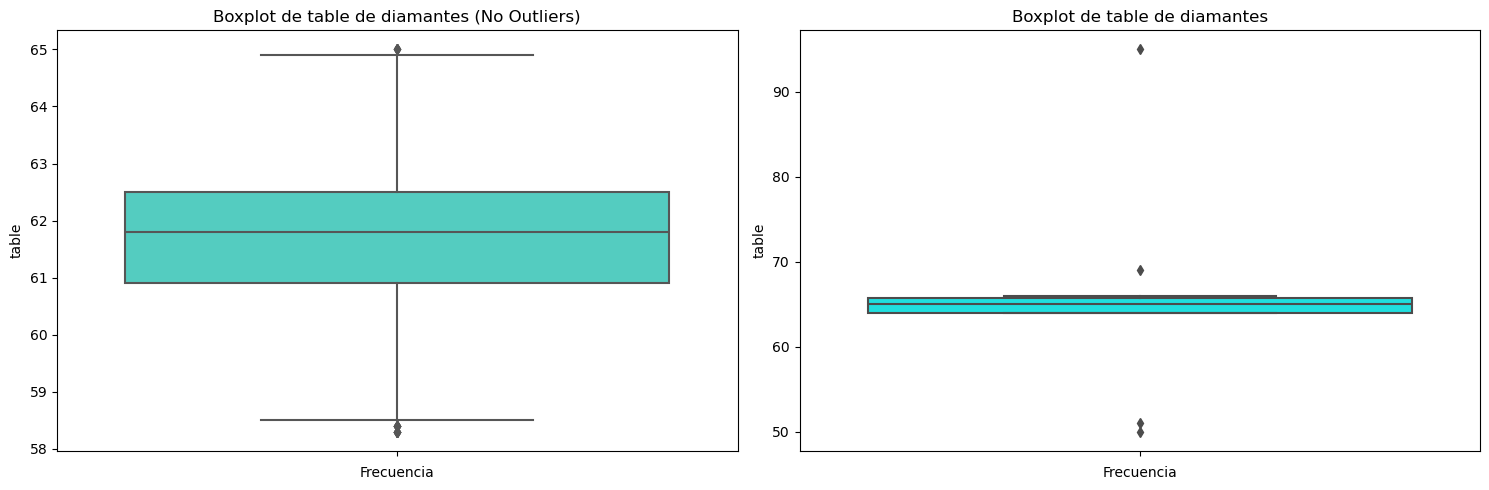

In [53]:
# Primer boxplot
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)  
sns.boxplot(y='depth', data=no_outliers_table, color='turquoise')
plt.ylabel('table')
plt.xlabel('Frecuencia')
plt.title('Boxplot de table de diamantes (No Outliers)')

# Segundo boxplot
plt.subplot(1, 2, 2)  
sns.boxplot(y='table', data=diamonds, color='cyan')
plt.ylabel('table')
plt.xlabel('Frecuencia')
plt.title('Boxplot de table de diamantes')

plt.tight_layout()  
plt.show()

In [54]:
diamonds = no_outliers_table.copy()
diamonds

,city,price,carat,depth,table,clarity,color,cut,dimensions
0,Paris,16389,2.04,59.9,58.0,SI2,G,Very Good,340.457376
1,London,12094,2.02,63.1,57.0,SI2,G,Very Good,321.752088
2,Antwerp,15166,2.16,62.6,55.0,SI2,G,Very Good,347.721000
3,New York City,16878,2.18,63.1,58.0,SI2,G,Very Good,355.461107
4,Kimberly,16188,2.11,62.2,60.0,SI2,G,Very Good,339.082380
...,...,...,...,...,...,...,...,...,...
2516,Antwerp,14833,1.61,61.6,61.0,VS2,F,Premium,260.215956
2517,Luxembourg,13474,1.51,62.2,60.0,VS2,F,Premium,241.596100
2518,Antwerp,14388,1.52,59.4,55.0,VS2,F,Premium,249.641440
2519,Antwerp,15602,1.59,60.2,60.0,VS2,F,Premium,264.887964


He limpiado los **features numéricos** de outliers

In [70]:
diamonds.describe().T

,count,mean,std,min,25%,50%,75%,max
price,2521.0,14948.060294,1965.545642,11912.0,13205.000000,14745.000000,16611.000000,18823.00000
carat,2521.0,1.843741,0.332632,1.0,1.530000,2.000000,2.060000,2.80000
depth,2521.0,61.672471,1.244641,58.3,60.900000,61.800000,62.500000,65.00000
table,2521.0,57.851607,1.997039,52.0,56.000000,58.000000,59.000000,63.00000
dimensions,2521.0,299.860357,89.788645,0.0,249.944706,316.172388,336.406392,3840.59806


# Observaciones Categóricas

In [55]:
# Matriz de correlación para valores numéricos
diamonds_corr_matrix = diamonds.select_dtypes(include='number').corr()
diamonds_corr_matrix

,price,carat,depth,table,dimensions
price,1.000000,0.374481,-0.056991,0.030702,0.196430
carat,0.374481,1.000000,0.028248,0.168097,0.588437
depth,-0.056991,0.028248,1.000000,-0.307759,-0.048895
table,0.030702,0.168097,-0.307759,1.000000,0.079759
dimensions,0.196430,0.588437,-0.048895,0.079759,1.000000


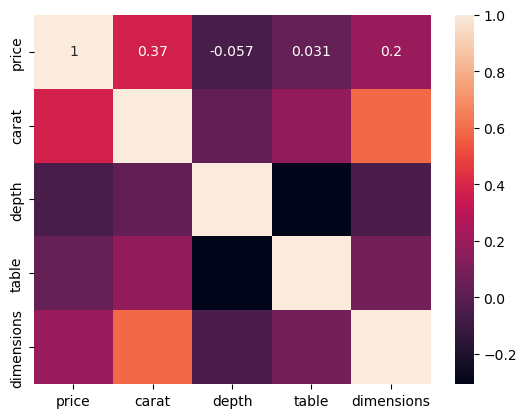

In [56]:
# Negative: One increases and the other one decreases
# Positive: One increases as much as the other one
# Closer to Zero: Weak relationship
# Closer to One (Neg os Pos): Strong relationship

sns.heatmap(diamonds_corr_matrix, annot=True)
plt.show()

Me quedaré con los **3 features** que considero **más relevantes:** 'price','carat','dimensions'

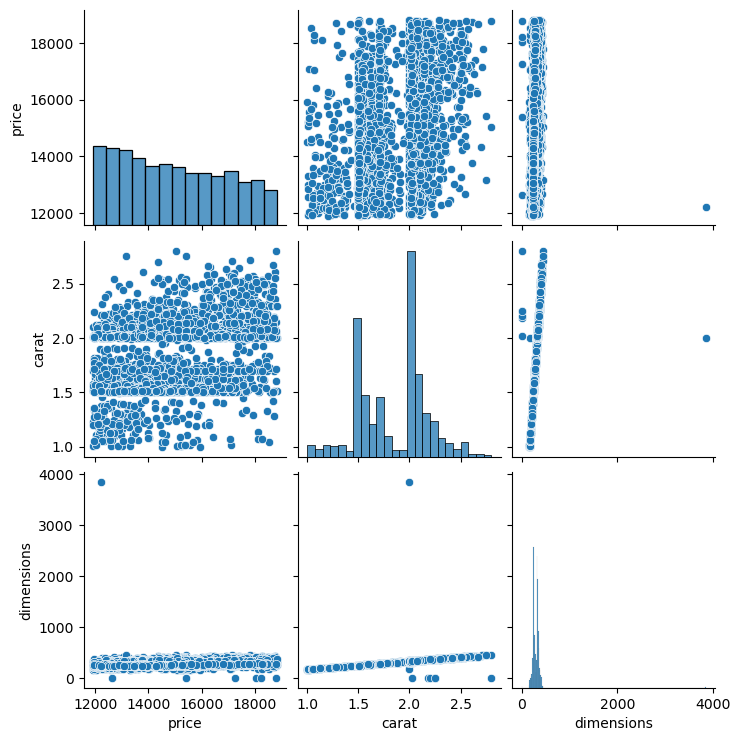

In [57]:
sns.pairplot(data=diamonds, vars=['price','carat','dimensions'])
plt.show()

El **corte o 'cut' del diamante** es lo que considero un feature importante, porque es lo que le determina si es un **terminado genérico o de lujo:**

In [62]:
diamonds['cut'].value_counts()

cut
Premium      941
Ideal        849
Very Good    560
Good         146
Fair          25
Name: count, dtype: int64

In [71]:
diamonds['price'].describe()

count     2521.000000
mean     14948.060294
std       1965.545642
min      11912.000000
25%      13205.000000
50%      14745.000000
75%      16611.000000
max      18823.000000
Name: price, dtype: float64

Ahora, tiene más sentido que para una **mediana y media de casi USD $15k**, la moda en corte sea **Premium** con una frecuencia de 941 veces.

Ahora, haré la gráfica de densidad de kernel para **tener confirmación:**

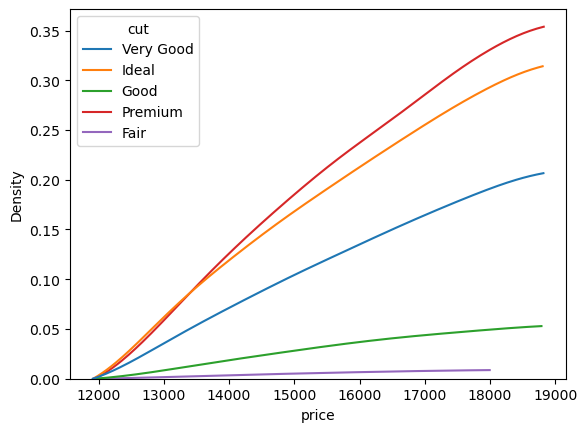

In [63]:
# Precio vs Corte
sns.kdeplot(data=diamonds, x='price', hue='cut', cut=0, cumulative=True) # cut=0: the curve is limited between min and max x values for price
plt.show()

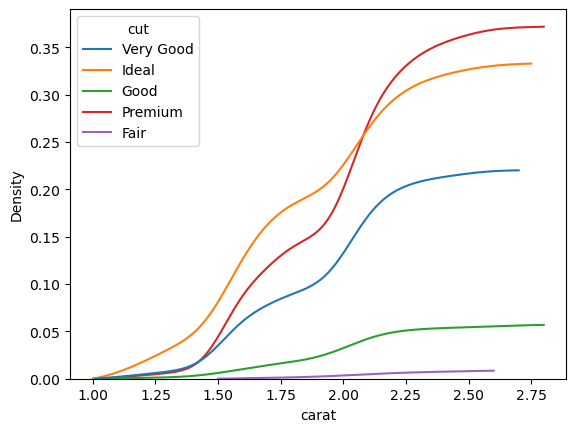

In [64]:
# Carat vs Corte
sns.kdeplot(data=diamonds, x='carat', hue='cut', cut=0, cumulative=True) # cut=0: the curve is limited between min and max x values for price
plt.show()

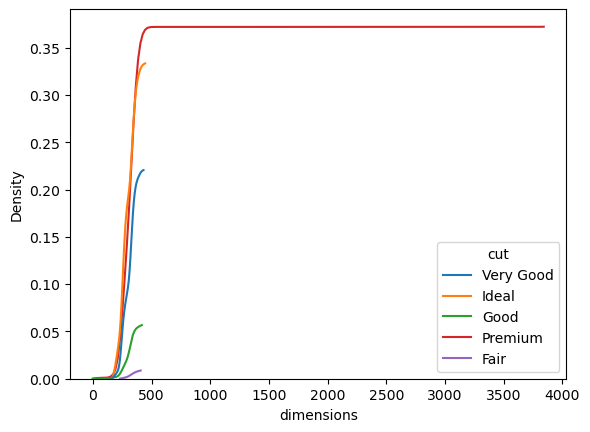

In [65]:
# Dimensiones vs Corte
sns.kdeplot(data=diamonds, x='dimensions', hue='cut', cut=0, cumulative=True) # cut=0: the curve is limited between min and max x values for price
plt.show()

El tipo de dato de **Price** a pesar de ser **int64** se puede tomar como valor **"continuo",** puesto que el precio es influido por factores de calidad del diamante.

La gráfica de densidad de kernel nos dice que hay una mayor probabilidad que el **corte** del diamante sea **Premium** a medida que el **precio sea mayor.**

**Caso contrario:** La probabilidad que el **corte** sea **justo (fair)** a medida que el precio sea mayor es **demasiado baja.**

Voy a finalizar este ejercicio haciendo un **boxplot comparativo por ciudad.**

La particularidad por ciudad será comparar por el **máximo valor de la mediana** junto con la  **mínima desviación estandar** para darle mayor precisión al análisis:

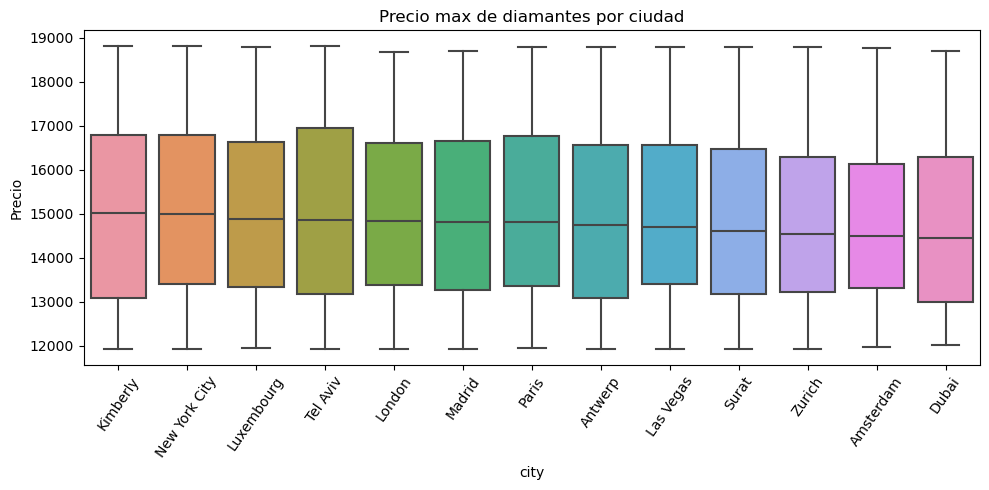

In [66]:
max_price_median = diamonds.groupby('city')['price'].median().sort_values(ascending=False).index
min_std_prices = diamonds.groupby('city')['price'].std().sort_values().index

max_median_min_std = []
for city in max_price_median:
    if city in min_std_prices and city not in max_median_min_std:
        max_median_min_std.append(city)

plt.figure(figsize=(10, 5))
sns.boxplot(data=diamonds, x='city', y='price', order=max_median_min_std)
plt.title('Precio max de diamantes por ciudad')
plt.ylabel('Precio')
plt.xticks(rotation=55)

plt.tight_layout()
plt.show()

La ciudad con la **mediana más alta** y la **desviación más baja** del precio es **[Kimberley, Sudáfrica](https://es.wikipedia.org/wiki/Kimberley_(Sud%C3%A1frica))**. Debido a que es una **ciudad minera de diamantes** puede ser que regule el precio y la calidad de los mismos. Y tenga más sentido.

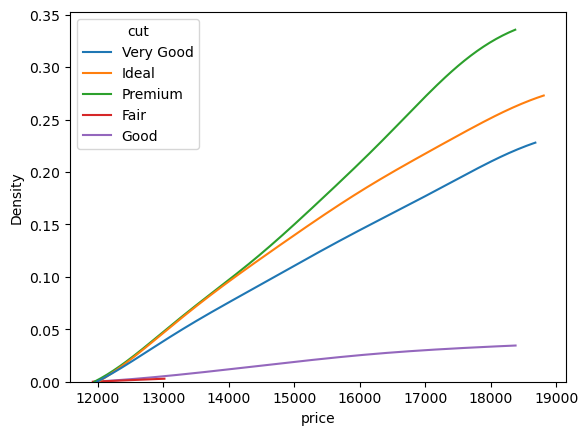

In [67]:
kimberly_diamonds = diamonds[diamonds['city'] == 'Kimberly']

sns.kdeplot(data=kimberly_diamonds, x='price', hue='cut', cut=0, cumulative=True) # cut=0: the curve is limited between min and max x values for price
plt.show()

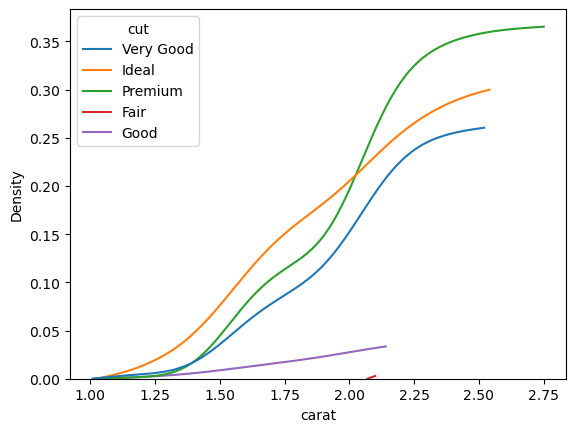

In [68]:
sns.kdeplot(data=kimberly_diamonds, x='carat', hue='cut', cut=0, cumulative=True) # cut=0: the curve is limited between min and max x values for price
plt.show()

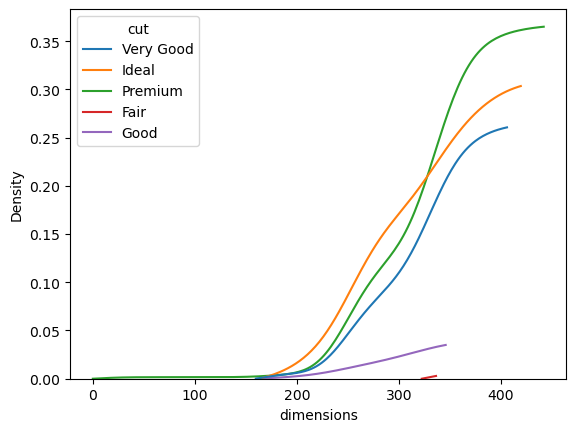

In [69]:
sns.kdeplot(data=kimberly_diamonds, x='dimensions', hue='cut', cut=0, cumulative=True) # cut=0: the curve is limited between min and max x values for price
plt.show()

# Conclusión del ejericicio:

1. Lo que pensabamos que eran outliers, **en realidad eran los datos mejor distribuidos y centrados**
2. El resultado del precio del diamante (aprox. USD 15k) **se acercó a mi hipotesis** (USD 10k, sin yo ser experto en diamantes)
3. El **corte con mayor frecuencia** para una media/mediana de aprox USD 15k se cataloga dentro de **premium**
4. La ciudad con el **mayor precio (mediana)** y **mayor precisión (menor desviación)** es Kimberley (además por el contexto histórico de ser territorio minero de diamantes)

In [72]:
diamonds.describe().T

,count,mean,std,min,25%,50%,75%,max
price,2521.0,14948.060294,1965.545642,11912.0,13205.000000,14745.000000,16611.000000,18823.00000
carat,2521.0,1.843741,0.332632,1.0,1.530000,2.000000,2.060000,2.80000
depth,2521.0,61.672471,1.244641,58.3,60.900000,61.800000,62.500000,65.00000
table,2521.0,57.851607,1.997039,52.0,56.000000,58.000000,59.000000,63.00000
dimensions,2521.0,299.860357,89.788645,0.0,249.944706,316.172388,336.406392,3840.59806
